# Lecture 7: Lovely Pandas

## Contents
- [Imports](#section1)
- [Datasets](#section2)
    - [Data representation](#subsection2.1)
    - [Type of variables](#subsection2.2)
- [Pandas for Data Analysis](#section3)
    - [The <code>pandas.Series</code> data structure](#subsection3.1)
    - [The <code>pandas.DataFrame</code> data structure](#subsection3.2)
    - [Read data from files](#subsection3.3)
- [Basics of Descriptive Analytics](#section4)
    - [Descriptive measures](#subsection4.1)
    - [Visualizing data](#subsection4.2)

## Imports <a id="section1"></a>

As suggested by [PEP 8 Coding Style Guide](https://www.python.org/dev/peps/pep-0008/#imports), the import statements should be placed at the top of the code file. Packages used in this lecture are imported in the first code cell. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Datasets <a id="section2"></a>

### Data representation <a id="subsection2.1"></a>
A dataset is a collection, or a table of data. 

<div class="alert alert-block alert-success">
<b>Example 1:</b> The following table contains a cross-sectional dataset on a number of working individuals for the year 1976. Columns of the data table are summarized as follows.
  <li><b>wage</b>: average hourly earnings (in dollars)</li>
  <li><b>educ</b>: years of education</li>
  <li><b>exper</b>: years of potential experience</li>
  <li><b>gender</b>: genders of these working individuals</li>
    <li><b>married</b>: <span style='font-family:Courier'><b>True</b></span> if married, and <span style='font-family:Courier'><b>False</b></span> otherwise</li>
</div> 

| $ $ |wage	| educ	| exper	| gender | married |
|:---:|:---:|:-----:|:-----:|:------:|:-------:|
|<b>0</b> |	3.10 |	11.0 |	2.0 | 	F | <code>False</code>|
|<b>1</b> |	3.24 |	12.0 |	22.0|	F | <code>True</code> |
|<b>2</b> |	3.00 |	11.0 |	2.0 |	M	| <code>False</code> |
|<b>3</b> |	6.00 |	8.0  |	44.0|	M	| <code>True</code> |
|<b>4</b> |	5.30 |	12.0 |	7.0 |	M | <code>True</code> |
|<b>5</b> |	8.75 |	16.0 |	9.0 |	M | <code>True</code>|

Typically a **dataset** is organized data as a rectangular array, with **variables** in **columns** and **observations** in **rows**. 

A **variable** (or **field**) is a characteristic of each individual in the dataset. In this case, four companies are represented by four variables. An **observation** (or **record**) is a collection of all variable values for an individual of the dataset. As you can see that the example above contains 6 observations.

### Types of variables <a id="subsection2.2"></a>
You may notice that in the dataset above, we usually have two different variable types: 
1. **Numerical data**: wages, years of education and potential experience
2. **Categorical data**: gender, and marriage status

There may be other types of variables, such as strings (like names), or dates that make the dataset into a time series.

In Python and many other programming languages, the Boolean status <code>True</code> has a numeric value <code>1</code>, and <code>False</code> has a value of <code>0</code>. The numeric values can be obtained by data type conversions, as shown by the code below. 

In [2]:
print(int(True))    # Convert True to its numeric value
print(int(False))   # Convert False to its numeric value

1
0


## Pandas for Data Analysis <a id="section3"></a>

Pandas is a Python package that provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. 

In this lecture, we will introduce two data types imported from the Pandas package: `Series` used for representing one-dimensional data, and `DataFrame` as a two-dimensional data table.


### The `pandas.Series` data structure <a id="subsection3.1"></a>
#### Create a `pandas.Series` type object
A `pandas.Series` is a one-dimensional array of **indexed data**. It can be created from another one-dimensional array-like object, such as a `list` or a `tuple`, using the constructor `pandas.Series()`.

In [3]:
wage = pd.Series([3.10, 3.24, 3.00, 6.00, 5.30, 8.75])
print(wage)

0    3.10
1    3.24
2    3.00
3    6.00
4    5.30
5    8.75
dtype: float64


In [4]:
educ = pd.Series((11.0, 12.0, 11.0, 8.0, 12.0, 16.0))
print(educ)

0    11.0
1    12.0
2    11.0
3     8.0
4    12.0
5    16.0
dtype: float64


#### Attributes of series

It can be seen from the code segment above, the printed message of a series shows
- The values of data elements;
- The indexes of data elements;
- The data type of all data elements. 

These properties are called **attributes** of a series. Each attribute can be accessed via the `.` operator (similar to methods, but without parentheses because attributes are not functions). For example, the values of data elements can be accessed as the `values` attribute. 

In [5]:
wage.values

array([3.1 , 3.24, 3.  , 6.  , 5.3 , 8.75])

In [6]:
educ.values

array([11., 12., 11.,  8., 12., 16.])

The indexes of a series can be accessed as the `index` attribute.

In [7]:
print(wage.index)
print(educ.index)

RangeIndex(start=0, stop=6, step=1)
RangeIndex(start=0, stop=6, step=1)


The default indexes of a series is a `RangeIndex` type object, which is very similar to the `range` type data structure, which is specified by the values of **start**, **stop**, and **step**. The indexes can also be specified to be other values using the keyword argument `index` when calling the `pandas.Series()` function. 

In [8]:
index = ['Mary', 'Ann', 'John', 'David', 'Frank', 'Ben']
exper = pd.Series([2.0, 22.0, 2.0, 44.0, 7.0, 9.0],
                  index=index)  # Specify series indexes
print(exper)

Mary      2.0
Ann      22.0
John      2.0
David    44.0
Frank     7.0
Ben       9.0
dtype: float64


In [9]:
print(exper.index)

Index(['Mary', 'Ann', 'John', 'David', 'Frank', 'Ben'], dtype='object')


The data type of all data elements is given as the `dtype` attributes.

In [10]:
print(wage.dtype)
print(educ.dtype)

float64
float64


Please note that built-in Python types, like `int`, `float`, or `str`, may take different names as the Pandas `dtype` or `dtypes` attributes, as summarized in the table below.

Pandas `dtype` | Built-in Python types 
:--------------|:---------------------
`object` | `str` or mixed types
`int64` | `int` 
`float64` | `float`
`bool` | `bool`

Similar to other data objects, data type conversion can be applied to items in series or data frames. As shown by the sample code below, the data type conversion can be conducted for all items in a series using the `astype()` method. 

In [11]:
educ_int = educ.astype(int)  # Define educ_int using the astype method
print(educ_int)              # All data items of educ_int are integers

0    11
1    12
2    11
3     8
4    12
5    16
dtype: int64


In [12]:
educ_str = educ.astype(str)  # Define educ_int using the astype method
print(educ_str)              # All data items of educ_int are strings

0    11.0
1    12.0
2    11.0
3     8.0
4    12.0
5    16.0
dtype: object


#### Indexing and slicing of `pandas.Series` objects via `iloc[]` and `loc[]` indexers

Items in a <code>pandas.Series</code> object can be accessed via two sets of indexing systems:
- **Label based indexes**, which can be retrieved via the <code>index</code> attribute of the series. The label-based indexes can be either integers, or strings.
- **Integer-position based indexes**, which always uses integers 0, 1, 2, ..., to mark the position of each item. 

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/series_position_label_index.png?raw=true" width=650>

Pandas provides some special indexer attributes that explicitly indicate which indexing scheme we are using. Among these special indexers, `iloc[]` is aimed for integer-position based indexing and slicing expressions. 

In [13]:
print(exper.iloc[1], '\n')
print(exper.iloc[:3], '\n')
print(exper.iloc[[0, 2]], '\n')
print(exper.iloc[::2])

22.0 

Mary     2.0
Ann     22.0
John     2.0
dtype: float64 

Mary    2.0
John    2.0
dtype: float64 

Mary     2.0
John     2.0
Frank    7.0
dtype: float64


It can be seen that the `iloc[]` indexer always refers to the integer-position based indexes, regardless of the values of the label based indexes. 

The label based indexes can be referred to using the `loc[]` indexer, as shown by the following sample code.

In [14]:
print(exper.loc['Ann'], '\n')
print(exper.loc[:'John'], '\n')
print(exper.loc[['Mary', 'John']], '\n')
print(exper.loc[::2])

22.0 

Mary     2.0
Ann     22.0
John     2.0
dtype: float64 

Mary    2.0
John    2.0
dtype: float64 

Mary     2.0
John     2.0
Frank    7.0
dtype: float64


<div class="alert alert-block alert-danger">
<b>Notes</b>:  In the slicing expressions for label based indexes, the item indexed by <b>stop</b> are included in the selection. This is different from the list style slicing syntax we learned before. 
</div>

The syntax of indexers `iloc[]` and `loc[]` is summarized below:
- The indexer `iloc[]` is for integer-position based indexes, the **stop** index is exclusive of the selection. 
- The indexer `loc[]` is for label based indexes, the **stop** index is inclusive of the selection.

In the following sample code where the label based indexes are exactly the same as the integer-position based indexes, please be very careful that the **stop** index is included in the `loc` slicing expression but excluded from the `iloc` slicing expression. 

In [17]:
print(wage.iloc[:2])        # Index 2 as the stop is excluded
print('\n')                 # Create an empty line
print(wage.loc[:2])         # Index 2 as the stop is included

0    3.10
1    3.24
dtype: float64


0    3.10
1    3.24
2    3.00
dtype: float64


### The `pandas.DataFrame` data structure <a id="subsection3.2"></a>

The next fundamental structure in Pandas is the `pandas.DataFrame`. A `pandas.DataFrame` object, or a data frame, is a two-dimensional data structure, where the columns represent different variables (fields), and the observations (records) are represented by rows.

#### Create a `pandas.DataFrame` object
A `pandas.DataFrame` object can be created from a dictionary, as shown by the example below.

In [18]:
data_dict = {'wage': [3.10, 3.24, 3.00, 6.00, 5.30, 8.75],
             'educ': [11.0, 12.0, 11.0, 8.0, 12.0, 16.0],
             'exper': [2.0, 22.0, 2.0, 44.0, 7.0, 9.0],
             'gender': ['F', 'F', 'M', 'M', 'M', 'M'],
             'married': [False, True, False, True, True, True]}

data_frame = pd.DataFrame(data_dict)        # Create a DataFrame object
data_frame                                  # Display the DataFrame

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,F,False
1,3.24,12.0,22.0,F,True
2,3.00,11.0,2.0,M,False
3,6.00,8.0,44.0,M,True
4,5.30,12.0,7.0,M,True
5,8.75,16.0,9.0,M,True


It can be seen that a data frame is created by the function `DataFrame()` from the `dict` type variable `data_dict`, where the dictionary keys become the names of variables, and the dictionary values, as lists of data items, become the values of each variable. 

You may verify the data types of these two variables by the following code.

In [19]:
print(type(data_dict))
print(type(data_frame))

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
display(data_frame.describe())

# NOT the way to get the mean of wage
data_frame.describe().iloc[1,1]


,wage,educ,exper
count,6.000000,6.000000,6.000000
mean,4.898333,11.666667,14.333333
std,2.271479,2.581989,16.280868
min,3.000000,8.000000,2.000000
25%,3.135000,11.000000,3.250000
50%,4.270000,11.500000,8.000000
75%,5.825000,12.000000,18.750000
max,8.750000,16.000000,44.000000


11.666666666666666

In [31]:
# Get value 12
print("CORRECT\n", data_frame.iloc[1:2, 1:2])
print()
print("WRONG\n", data_frame.loc[1:2, 'educ'])

CORRECT
    educ
1  12.0

WRONG
 1    12.0
2    11.0
Name: educ, dtype: float64


#### Attributes of data frames

As a two-dimensional data structure, the `pandas.DataFrame` type object has two sets of indexes:
- Column indexes (labels): names of variables/fields, and can be accessed by the `columns` attribute of the data frame. 
- Row indexes (labels): indexes of observations/records, and can be accessed by the `index` attribute of the data frame.

In [32]:
print(data_frame.columns)
print(data_frame.index)

Index(['wage', 'educ', 'exper', 'gender', 'married'], dtype='object')
RangeIndex(start=0, stop=6, step=1)


Notice that the `index` attribute (row labels) of the data frame has the same default values as a series, and similar to series, the index of a data frame can be specified by the keyword argument `index` when calling the `pandas.DataFrame()` function in creating a data frame. 

In [33]:
index = ['Mary', 'Ann', 'John', 'David', 'Frank', 'Ben']
data_frame_new = pd.DataFrame(data_dict, index=index)  

data_frame_new

,wage,educ,exper,gender,married
Mary,3.10,11.0,2.0,F,False
Ann,3.24,12.0,22.0,F,True
John,3.00,11.0,2.0,M,False
David,6.00,8.0,44.0,M,True
Frank,5.30,12.0,7.0,M,True
Ben,8.75,16.0,9.0,M,True


In [34]:
print(data_frame_new.columns)
print(data_frame_new.index)

Index(['wage', 'educ', 'exper', 'gender', 'married'], dtype='object')
Index(['Mary', 'Ann', 'John', 'David', 'Frank', 'Ben'], dtype='object')


The data frame also has a `dtypes` attribute that shows the data type of each column.

In [35]:
data_frame.dtypes

wage       float64
educ       float64
exper      float64
gender      object
married       bool
dtype: object

#### Indexing and slicing of `pandas.DataFrame` objects via `iloc[]` and `loc[]` indexers

Similar to the series cases, data items in a data frame can be selected using the either the integer-position based or label based indexes. The main difference is that a data frame is a two-dimensional data structure, so the selection requires specifying both the row and column indexes, see the figure below.

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/pd_position_label_index.png?raw=true" width=600>

For selections via the integer-position based indexes, we can use the same `iloc[]` indexer, which ignores the label based indexes of the rows or columns. 

In [36]:
data_subset = data_frame.iloc[1:3, 1:3] 
print(data_subset)

   educ  exper
1  12.0   22.0
2  11.0    2.0


In [37]:
data_new_subset = data_frame_new.iloc[1:3, 1:3]
print(data_new_subset)

      educ  exper
Ann   12.0   22.0
John  11.0    2.0


If the the all rows are selected, we could use `:` to specify the row indexes. 

In [38]:
cols = data_frame.iloc[:, 2] 
print(cols)

0     2.0
1    22.0
2     2.0
3    44.0
4     7.0
5     9.0
Name: exper, dtype: float64


Similarly, the `:` operator could be used to select all columns, or we can leave the column indexer unspecified and all columns are selected by default. 

In [39]:
rows = data_frame_new.iloc[2:5, :]  
print(rows)

       wage  educ  exper gender  married
John    3.0  11.0    2.0      M    False
David   6.0   8.0   44.0      M     True
Frank   5.3  12.0    7.0      M     True


In [40]:
rows = data_frame_new.iloc[2:5]  
print(rows)

       wage  educ  exper gender  married
John    3.0  11.0    2.0      M    False
David   6.0   8.0   44.0      M     True
Frank   5.3  12.0    7.0      M     True


Likewise, the <code>loc[]</code> indexers specify rows and columns via label-based indexes.

In [43]:
display(data_frame)
data_subset = data_frame.loc[1:2, 'educ':'exper']
print(data_subset)

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,F,False
1,3.24,12.0,22.0,F,True
2,3.00,11.0,2.0,M,False
3,6.00,8.0,44.0,M,True
4,5.30,12.0,7.0,M,True
5,8.75,16.0,9.0,M,True


   educ  exper
1  12.0   22.0
2  11.0    2.0


In [44]:
display(data_frame_new)
data_new_subset = data_frame_new.loc['Ann':'John', 'educ':'exper']
print(data_new_subset)

,wage,educ,exper,gender,married
Mary,3.10,11.0,2.0,F,False
Ann,3.24,12.0,22.0,F,True
John,3.00,11.0,2.0,M,False
David,6.00,8.0,44.0,M,True
Frank,5.30,12.0,7.0,M,True
Ben,8.75,16.0,9.0,M,True


      educ  exper
Ann   12.0   22.0
John  11.0    2.0


<div class="alert alert-block alert-danger">
<b>Notes</b>:  In the slicing expressions for label based indexes, the item indexed by <b>stop</b> are included in the selection. This is different from the list style slicing syntax we learned before. 
</div>

Similar to the cases of `iloc[]` indexers, we can use the `:` operator to select all rows or columns, or leave the column indexes to be unspecified so that all columns are selected by default. 

In [45]:
cols = data_frame.loc[:, 'exper'] 
print(cols)

0     2.0
1    22.0
2     2.0
3    44.0
4     7.0
5     9.0
Name: exper, dtype: float64


In [46]:
rows = data_frame_new.loc['John':'Ben', :]  
print(rows)

       wage  educ  exper gender  married
John   3.00  11.0    2.0      M    False
David  6.00   8.0   44.0      M     True
Frank  5.30  12.0    7.0      M     True
Ben    8.75  16.0    9.0      M     True


In [47]:
rows = data_frame_new.loc['John':'Ben']  
print(rows)

       wage  educ  exper gender  married
John   3.00  11.0    2.0      M    False
David  6.00   8.0   44.0      M     True
Frank  5.30  12.0    7.0      M     True
Ben    8.75  16.0    9.0      M     True


Besides using the `iloc[]` and `loc[]` indexers to access a subset of the data frame, we can directly use the `[]` to select a column of the dataset, as demonstrated by the code cells below.

In [48]:
data_frame['educ']

0    11.0
1    12.0
2    11.0
3     8.0
4    12.0
5    16.0
Name: educ, dtype: float64

In [49]:
data_frame_new['educ']

Mary     11.0
Ann      12.0
John     11.0
David     8.0
Frank    12.0
Ben      16.0
Name: educ, dtype: float64

Please note that data type of the selecting a column directly using `[]` is `pandas.Series`.

In [50]:
print(type(data_frame['educ']))
print(type(data_frame_new['educ']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Change `pandas.DataFrame` objects in-place <a id="subsection2.5"></a>
Similar to mutable data types like `list` or `dict`, the `pandas.DataFrame` objects are also mutable, and we can change a part of a data frame in-place. The syntax of change data frame content is similar to other mutable data types: applying assignment statement on a subset of data selected by indexing or slicing. 

Consider the variable `data_frame`.

In [51]:
print(data_frame)

   wage  educ  exper gender  married
0  3.10  11.0    2.0      F    False
1  3.24  12.0   22.0      F     True
2  3.00  11.0    2.0      M    False
3  6.00   8.0   44.0      M     True
4  5.30  12.0    7.0      M     True
5  8.75  16.0    9.0      M     True


Changes are applied to data items selected via the `loc[]` and `iloc[]` indexers. 

In [52]:
data_frame.loc[2:3, 'educ'] = 9.0  
data_frame

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,F,False
1,3.24,12.0,22.0,F,True
2,3.00,9.0,2.0,M,False
3,6.00,9.0,44.0,M,True
4,5.30,12.0,7.0,M,True
5,8.75,16.0,9.0,M,True


In [53]:
data_frame.iloc[2, 1:3] = 1.0   
data_frame

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,F,False
1,3.24,12.0,22.0,F,True
2,3.00,1.0,1.0,M,False
3,6.00,9.0,44.0,M,True
4,5.30,12.0,7.0,M,True
5,8.75,16.0,9.0,M,True


The <code>loc[]</code> indexer can even by used to create new columns. As demonstrated by the following example, the index `'remarks'` is not a label of the old data frame, then a new field named `'remarks'` is appended as the last column to the data frame. 

In [54]:
data_frame.loc[:, 'remarks'] = 'none'
data_frame

,wage,educ,exper,gender,married,remarks
0,3.10,11.0,2.0,F,False,none
1,3.24,12.0,22.0,F,True,none
2,3.00,1.0,1.0,M,False,none
3,6.00,9.0,44.0,M,True,none
4,5.30,12.0,7.0,M,True,none
5,8.75,16.0,9.0,M,True,none


#### Boolean series and boolean indexing <a id="subsection2.6"></a>

**Boolean indexing** is typically used for filtering or segmenting data according to given conditions. The boolean indexing operations are conducted with a boolean type series, created by boolean statements and logical operators. 

In [55]:
data_frame['married']

0    False
1     True
2    False
3     True
4     True
5     True
Name: married, dtype: bool

In [56]:
is_female = data_frame['gender'] == 'F'     # True if the record is a female
print(is_female)

0     True
1     True
2    False
3    False
4    False
5    False
Name: gender, dtype: bool


In [57]:
is_high_wage = data_frame['wage'] > 4       # True if the hourly wage is larger than 4 dollars
print(is_high_wage)

0    False
1    False
2    False
3     True
4     True
5     True
Name: wage, dtype: bool


In [58]:
not_female = data_frame['gender'] != 'F'
print(not_female)

0    False
1    False
2     True
3     True
4     True
5     True
Name: gender, dtype: bool


In addition, the following bitwise operators can be used to create more complicated logics for boolean series. 

- The bitwise "and" logic: `&`
- The bitwise "or" logic: `|`
- The bitwise "not" logic: `~`

In [59]:
cond1 = data_frame['gender']=='F'
cond2 = data_frame['married']
is_wife = cond1 & cond2
print(is_wife)

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool


In [60]:
cond1 = data_frame['educ']>9
cond2 = data_frame['exper']>3
is_skillful = cond1 | cond2
print(is_skillful)

0     True
1     True
2    False
3     True
4     True
5     True
dtype: bool


In the code above, the bitwise operators are applied to the whole boolean series, instead of a single value of `True` or `False`. This is different from the `and`, `or`, and `not` operators we learned before. 

Such boolean series can be used as the row indexes in the `loc[]` indexer to access or to modify a subset of rows that satisfy some given conditions. For example, we may be able to achieve a data frame that contains only female records.

In [61]:
is_female = data_frame['gender'] == 'F'     # A boolean Series 
females = data_frame.loc[is_female]         # Select rows indicated by True
print(females)

   wage  educ  exper gender  married remarks
0  3.10  11.0    2.0      F    False    none
1  3.24  12.0   22.0      F     True    none


In the sample code below, we are using boolean indexing to make changes on some records of the `remarks` filed. 

In [65]:
cond1 = data_frame['gender']=='F'
cond2 = data_frame['married']
is_wife = cond1 & cond2
data_frame.loc[is_wife, 'remarks'] = 'Wife'   
print(data_frame)

   wage  educ  exper gender  married remarks
0  3.10  11.0    2.0      F    False    none
1  3.24  12.0   22.0      F     True    Wife
2  3.00   1.0    1.0      M    False    none
3  6.00   9.0   44.0      M     True    none
4  5.30  12.0    7.0      M     True    none
5  8.75  16.0    9.0      M     True    none


<div class="alert alert-block alert-info">
<b>Question 1:</b>  
Make changes to the data frame above such that:
    <li> Values for married male in the column <span style='font-family:Courier'><b>'remarks'</b></span> is changed to the string <span style='font-family:Courier'><b>'Husband'</b></span>.</li>
    <li> Values for unmarried male or unmarried female in the column <span style='font-family:Courier'><b>'remarks'</b></span> is changed to the string <span style='font-family:Courier'><b>'Single'</b></span>.</li>
</div>

In [69]:
# We need the brackets around each sub-condition
is_husband = (data_frame['gender'] == 'M') & (data_frame['married'])
data_frame.loc[is_husband, 'remarks'] = 'Husband'
print(data_frame)

   wage  educ  exper gender  married  remarks
0  3.10  11.0    2.0      F    False     none
1  3.24  12.0   22.0      F     True     Wife
2  3.00   1.0    1.0      M    False     none
3  6.00   9.0   44.0      M     True  Husband
4  5.30  12.0    7.0      M     True  Husband
5  8.75  16.0    9.0      M     True  Husband


### Read data from files <a id="subsection3.3"></a>

In fact, the method introduced in the previous section is rarely used in creating <code>pandas.DataFrame</code> data structures, because directly typing in the data into a dictionary is inefficient and tedious. In practical implementation, it is more common to read data from a file, as the example below.

In [70]:
data = pd.read_csv('wage.csv')  # Read data from a file "wage.csv"
data

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,F,False
1,3.24,12.0,22.0,F,True
2,3.00,11.0,2.0,M,False
3,6.00,8.0,44.0,M,True
4,5.30,12.0,7.0,M,True
...,...,...,...,...,...
521,15.00,16.0,14.0,F,True
522,2.27,10.0,2.0,F,False
523,4.67,15.0,13.0,M,True
524,11.56,16.0,5.0,M,True


We often display the first a few rows of the data frame using the `head()` method, to show the column labels and typical values of each variable.

In [71]:
print(data.head(6))                 # Return the first six rows of data

   wage  educ  exper gender  married
0  3.10  11.0    2.0      F    False
1  3.24  12.0   22.0      F     True
2  3.00  11.0    2.0      M    False
3  6.00   8.0   44.0      M     True
4  5.30  12.0    7.0      M     True
5  8.75  16.0    9.0      M     True


## Basics of Descriptive Analytics <a id="section4"></a>

### Descriptive measures <a id="subsection4.1"></a>
**Descriptive analytics** creates a summary of historical data to yield useful information and possibly prepare the data for further analysis. Such information may include some basic descriptive measures of data and graphs showing important insights.

#### Centers, variations, and extreme points
Please note that some descriptive measures can only be applied to numerical variables, so before calling methods for calculating such measures, we need to drop columns that are not numerical. This step is required in the new version of Pandas package, and you may receive a warning message if non-numerical variables present in the data frame. According to the [Official website of Pandas](https://pandas.pydata.org/pandas-docs/dev/whatsnew/v1.3.0.html#deprecated-dropping-nuisance-columns-in-dataframe-reductions-and-dataframegroupby-operations), there will be a type error raised in future version of Pandas if calculations are conducted on non-numerical variables.

In [72]:
data = pd.read_csv('wage.csv')           # Read data from a file "wage.csv"
data_num = data.drop(columns='gender')   # Create a data frame with only numerical variables
data_num

,wage,educ,exper,married
0,3.10,11.0,2.0,False
1,3.24,12.0,22.0,True
2,3.00,11.0,2.0,False
3,6.00,8.0,44.0,True
4,5.30,12.0,7.0,True
...,...,...,...,...
521,15.00,16.0,14.0,True
522,2.27,10.0,2.0,False
523,4.67,15.0,13.0,True
524,11.56,16.0,5.0,True


Typical center measures, such as the average and median values, can be calculated using the `mean()` and `median()` methods, respectively. 

In [73]:
means = data_num.mean()
print(means)

print('\n')

medians = data_num.median()
print(medians)

wage        5.896103
educ       12.562738
exper      17.017110
married     0.608365
dtype: float64


wage        4.65
educ       12.00
exper      13.50
married     1.00
dtype: float64


In [74]:
print(type(means))
print(type(medians))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Please note that the mean/median value of each column is stored in a `pandas.Series` type object, where the indexes are variable names, rather than the integer positions. 

Also notice that in the case of the categorical variable `married`, the mean value $0.608365$ is the proportion of observations in the dataset labeled as "married". This is because the `True` or `False` boolean values are converted to numeric values: ones or zeros, so that the mean value is the same as the proportion of `True`s (ones).

Similarly, the measures of variances and standard deviations can be calculated by the corresponding methods.

In [75]:
data_num.var()         # Sample Variance of each column

wage        13.638884
educ         7.667485
exper      184.203516
married      0.238711
dtype: float64

In [76]:
data_num.std()         # Sample Standard deviation of each column

wage        3.693086
educ        2.769022
exper      13.572160
married     0.488580
dtype: float64

The maximum and minimum points in the dataset can also be found.

In [77]:
data.max()         # Maximum value of each column

wage       24.98
educ        18.0
exper       51.0
gender         M
married     True
dtype: object

In [78]:
data.min()         # Minimum value of each colum

wage        0.53
educ         0.0
exper        1.0
gender         F
married    False
dtype: object

All the methods above can also be applied to each column (a series) to achieve the statistical measure of a variable, as shown by the following examples.

In [79]:
print(data['wage'].median())
print(data['exper'].max())
print((data['gender']=='M').mean())

4.65
51.0
0.5209125475285171


Please note that the last line of code calculates the proportion of males in the dataset. An alternative way to calculate the proportion of each value of a categorical variable is by using the method `value_counts()`. By default, the `value_counts()` function returns a series showing the counts of each unique value of a given series, such as for the series `data['gender']`, the `value_counts()` method returns the counts of values `'M'` and `'F'`. 

In [82]:
data['gender'].value_counts()               # Numbers of males and females

M    274
F    252
Name: gender, dtype: int64

The counts can be normalized into proportions by specifying the keyword argument `normalize` to be `True`. 

In [83]:
data['gender'].value_counts(normalize=True) # Proportions of males and females

M    0.520913
F    0.479087
Name: gender, dtype: float64

#### The `corr()` and `cov()` methods

The `corr()` method returns a data frame that shows the correlation between each pair of variables. 

In [84]:
data.corr()

,wage,educ,exper,married
wage,1.000000,0.405903,0.112903,0.228817
educ,0.405903,1.000000,-0.299542,0.068881
exper,0.112903,-0.299542,1.000000,0.316984
married,0.228817,0.068881,0.316984,1.000000


Similarly the `cov()` method returns the covariance between each pair of variables.

In [85]:
data.cov()

,wage,educ,exper,married
wage,13.638884,4.150864,5.659076,0.412871
educ,4.150864,7.667485,-11.257266,0.093188
exper,5.659076,-11.257266,184.203516,2.101952
married,0.412871,0.093188,2.101952,0.238711


#### The `describe()` method

For `pandas.DataFrame` and `pandas.Series`, the method `describe()` is a convenient tool to summarize some key measures altogether.

In [86]:
wage_summary = data.describe()  # Obtain the key descriptive measures 
print(wage_summary)             # Display these measures as a table

             wage        educ      exper
count  526.000000  526.000000  526.00000
mean     5.896103   12.562738   17.01711
std      3.693086    2.769022   13.57216
min      0.530000    0.000000    1.00000
25%      3.330000   12.000000    5.00000
50%      4.650000   12.000000   13.50000
75%      6.880000   14.000000   26.00000
max     24.980000   18.000000   51.00000


The variable `wage_summary` is a `pandas.DataFrame` type object where the row labels are the names of the descriptive measures. 

Note that rows `25%`, `50%`, and `75%` represent the first (Q1), second(Q2), and third quartiles(Q3), respectively. The value Q3 - Q1 is called the interquartile range (IQR). 

<img src="http://www.brainfuse.com/quizUpload/c_83740/quartiles2.gif" width=450>

Besides methods mentioned above, there are many other methods available for you to calculate descriptive measures via one line of code. You may check [Essential Basic Functionality](https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

### Visualizing data <a id="subsection4.2"></a>

In addition to `describe()` and other methods to obtain these numerical measures, Python also provides convenient tools for graphical representations of data characteristics. 

For example, we may use a boxplot to display the distribution of data based on a five-value summary:
1. The "minimum" value: Q1 -1.5*IQR, or the actual minimum value
2. The first quartile: Q1
3. The second quartile, or the median: Q2, 
4. The third quartile: Q3
5. The “maximum” value: Q3 + 1.5*IQR, or the actual maximum value

Additionally, it can also show outliers and their values. One illustrative example is given below. An illustration of these five values for a normal distribution case is provided below.
<img src="https://cdn-images-1.medium.com/max/1600/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width=500>

For the wage data case, we may draw the box plot via the following code.

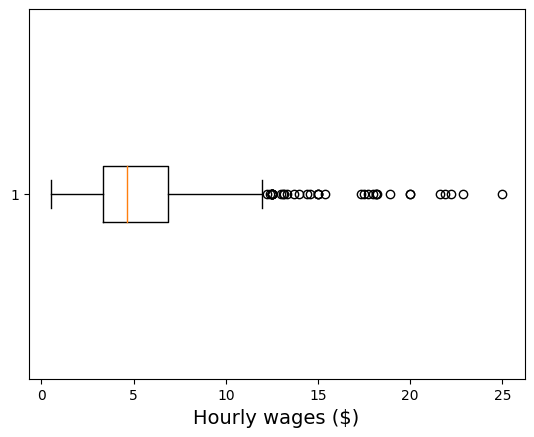

In [87]:
plt.boxplot(data['wage'], vert=False)       # Create a horizontal boxplot
plt.xlabel('Hourly wages ($)', fontsize=14) # Label of the x axis
plt.show()

<div class="alert alert-block alert-danger">
<b>Notes:</b>  
    </ul>
        <li> The "minimum" and "maximum" in the boxplot may not be the actual minimum and maximum values in the data set. They could be calculated according to the $1.5\times$IQR rule.</li>
        <li> Observations or samples outside of the $1.5\times$IQR ranges are recognized as "outliers", as they are too distant from the other observations. </li>
        <li> An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. </li>
    </ul>
</div>

You may compare the box plot and the histogram of the wages below, and see if you can relate each value of the box plot with the distribution of the data set.

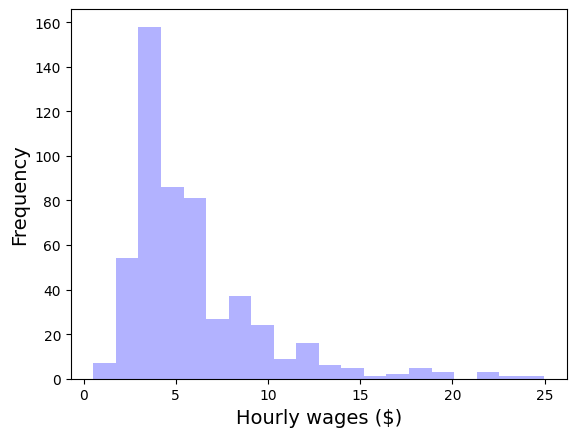

In [88]:
plt.hist(data['wage'], bins=20,     # Histogram of wages with 20 bins
         color='b', alpha=0.3);     # Color is blue, opacity is 0.3  
plt.xlabel('Hourly wages ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

Besides, we can also visualize the relations between variables using scatter plots. The code cell below shows how the workers' eduction backgrounds affect their hourly wages.

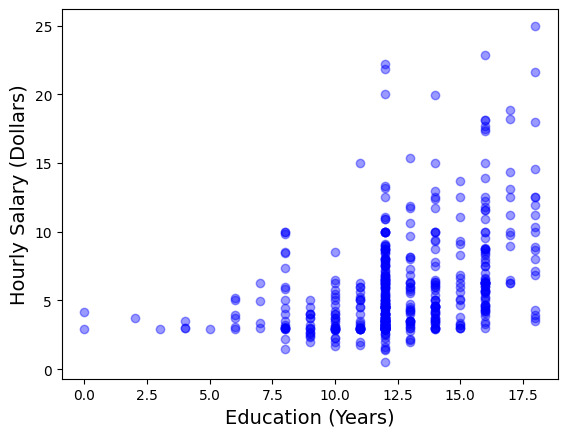

In [89]:
plt.scatter(data['educ'], data['wage'], color='b', alpha=0.4)

plt.xlabel('Education (Years)', fontsize=14)
plt.ylabel('Hourly Salary (Dollars)', fontsize=14)
plt.show()

<div class="alert alert-block alert-info">
<b>Question 2:</b>  
    <li> Visualize how workers' potential experiences affect their hourly wages.</li>
    <li> Visualize how married male workers' education backgrounds affect their hourly salaries.</li>
    <li> Visualize the distribution of female workers' wages.</li>
</div>